# Regresión logística para predicciones bancarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data cleaning

In [2]:
# dataset bancario: deposito de plazo fijo, datos de usuario y si los usuarios aceptaron o no el plazo fijo
data = pd.read_csv('../python-ml-course-master/datasets/bank/bank.csv', sep=';')
data[18:25]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
18,45,entrepreneur,married,university.degree,unknown,yes,yes,cellular,aug,mon,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
19,50,blue-collar,married,basic.4y,no,no,yes,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,yes
20,55,services,married,basic.6y,unknown,yes,no,cellular,jul,tue,...,6,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
21,39,technician,divorced,high.school,no,no,no,cellular,mar,mon,...,1,12,2,success,-1.8,93.369,-34.8,0.639,5008.7,yes
22,29,technician,single,university.degree,no,yes,yes,cellular,aug,wed,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,no
23,40,management,married,high.school,no,no,yes,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
24,44,technician,married,professional.course,unknown,yes,no,telephone,may,fri,...,7,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no


In [3]:
data.shape

(4119, 21)

In [4]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [5]:
# cambiamos el valor de la columna Y a binario
data["y"] = (data["y"] == "yes").astype(int)
data[18:25]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
18,45,entrepreneur,married,university.degree,unknown,yes,yes,cellular,aug,mon,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
19,50,blue-collar,married,basic.4y,no,no,yes,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,1
20,55,services,married,basic.6y,unknown,yes,no,cellular,jul,tue,...,6,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
21,39,technician,divorced,high.school,no,no,no,cellular,mar,mon,...,1,12,2,success,-1.8,93.369,-34.8,0.639,5008.7,1
22,29,technician,single,university.degree,no,yes,yes,cellular,aug,wed,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,0
23,40,management,married,high.school,no,no,yes,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
24,44,technician,married,professional.course,unknown,yes,no,telephone,may,fri,...,7,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,0


In [6]:
# listar categoria de educacion
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [7]:
# Cambiar valores de la columna para limpiar o ordenar
data["education"] = np.where(data["education"] == "basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"] == "basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"] == "basic.9y", "Basic", data["education"])

data["education"] = np.where(data["education"] == "high.school", "High School", data["education"])
data["education"] = np.where(data["education"] == "professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"] == "university.degree", "University Degree", data["education"])

data["education"] = np.where(data["education"] == "illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"] == "unknown", "Unknown", data["education"])

In [8]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

## Data wrangling

In [9]:
data["y"].value_counts()

# Compra de producto
# NO: 3668
# SI: 451

0    3668
1     451
Name: y, dtype: int64

In [10]:
# Promedio de todos los datos agrupados por si compran o no el producto
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [11]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compra del producto')

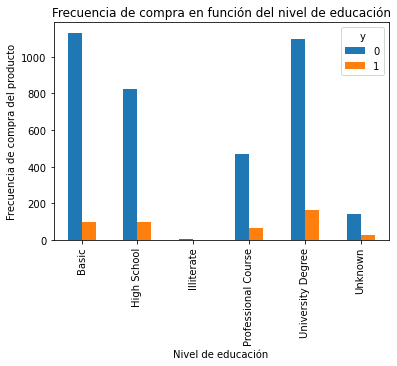

In [12]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Proporción de clientes')

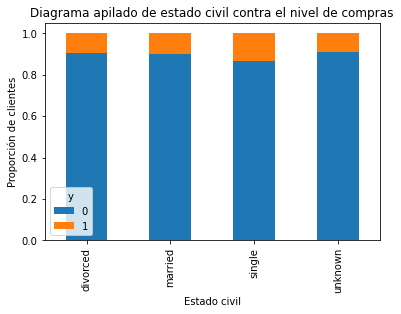

In [13]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Frecuencia de compra del producto')

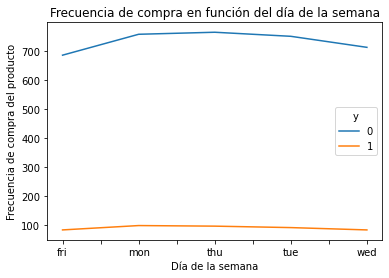

In [14]:
%matplotlib inline
pd.crosstab(data.day_of_week, data.y).plot()
plt.title("Frecuencia de compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra del producto")


Text(0, 0.5, 'Frecuencia de compra del producto')

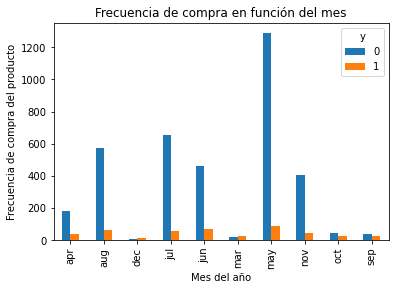

In [15]:
%matplotlib inline
pd.crosstab(data.month, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")


Text(0, 0.5, 'Clientes')

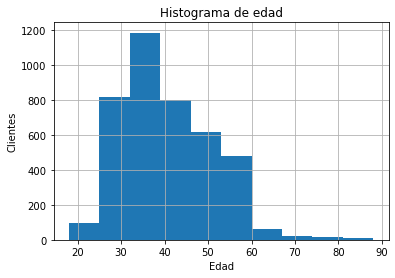

In [16]:
%matplotlib inline
data.age.hist()
plt.title("Histograma de edad")
plt.xlabel("Edad")
plt.ylabel("Clientes")


Text(0, 0.5, 'Frecuencia de compra del producto')

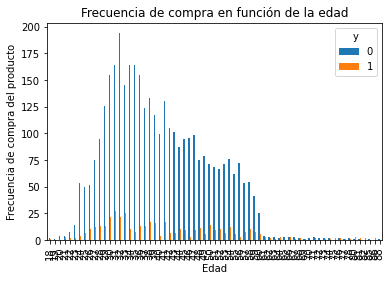

In [17]:
%matplotlib inline
pd.crosstab(data.age, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función de la edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia de compra del producto")


## Creación del Modelo logístico

### Conversión de las variables categóricas a dummies

In [18]:
# Funcion para la conversion
categories = ["job", "marital", "education", "housing", "loan", "contact",
    "month", "day_of_week", "poutcome"]
for category in categories:
    cat_list = "cat" + "_" + category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new


In [19]:
data_vars = data.columns.values.tolist()

to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ["default"]]

bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'd

In [20]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

### Selección de rasgos para el modelo

In [21]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [22]:
lr = LogisticRegression()

In [23]:
rfe = RFE(lr, n_features_to_select=12, step=1)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

c:\Users\alk10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\alk10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [24]:
# Columnas seleccionadas para quedar en el modelo
print(rfe.support_)

[False False False False  True False False False  True False False False
 False False False  True False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True False
 False False False False False False False  True False  True]


In [25]:
print(rfe.ranking_)

[30 40 17 45  1 16 26 19  1 31  2  9  6 38  8  1  7 21 43  1  1 41 14 27
 23 47 28 20 46 11 12  4 10  5 44 13 18 29  3 24 33 32  1  1  1  1  1 22
 37 42 39 36 25 34 35  1 15  1]


In [26]:
# listado de variable | si entra en el modelo | ranking
z = zip(bank_data_vars,rfe.support_, rfe.ranking_)
list(z)

[('age', False, 30),
 ('duration', False, 40),
 ('campaign', False, 17),
 ('pdays', False, 45),
 ('previous', True, 1),
 ('emp.var.rate', False, 16),
 ('cons.price.idx', False, 26),
 ('cons.conf.idx', False, 19),
 ('euribor3m', True, 1),
 ('nr.employed', False, 31),
 ('y', False, 2),
 ('job_admin.', False, 9),
 ('job_blue-collar', False, 6),
 ('job_entrepreneur', False, 38),
 ('job_housemaid', False, 8),
 ('job_management', True, 1),
 ('job_retired', False, 7),
 ('job_self-employed', False, 21),
 ('job_services', False, 43),
 ('job_student', True, 1),
 ('job_technician', True, 1),
 ('job_unemployed', False, 41),
 ('job_unknown', False, 14),
 ('marital_divorced', False, 27),
 ('marital_married', False, 23),
 ('marital_single', False, 47),
 ('marital_unknown', False, 28),
 ('education_Basic', False, 20),
 ('education_High School', False, 46),
 ('education_Illiterate', False, 11),
 ('education_Professional Course', False, 12),
 ('education_University Degree', False, 4),
 ('education_Unkno

In [27]:
cols = ["previous", "euribor3m", "job_blue-collar", "job_retired", "month_aug", "month_dec",
        "month_jul", "month_jun", "month_mar", "month_nov", "day_of_week_wed", "poutcome_nonexistent"]

X = bank_data[cols]  # var independientes
Y = bank_data["y"]  # var dependiente

### Implementación del modelo en python con statsmodel.api

In [28]:
import statsmodels.api as sm

In [29]:
logit_model = sm.Logit(Y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [30]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.155     
Dependent Variable:   y                 AIC:               2427.6025 
Date:                 2022-10-08 15:28  BIC:               2503.4828 
No. Observations:     4119              Log-Likelihood:    -1201.8   
Df Model:             11                LL-Null:           -1422.9   
Df Residuals:         4107              LLR p-value:       6.4492e-88
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
euribor3m            -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
job_blue-collar      -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
=====================================================================

"""

### Implementación del modelo en python con scikit-learn

In [31]:
from sklearn import linear_model

In [32]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X, Y)

LogisticRegression()

In [33]:
# r^2 ajustado
logit_model.score(X, Y)

0.8958485069191552

In [34]:
# cant de gente que compra
1 - Y.mean()

# 10,9% de la gente compra
# 89% de la gente NO compra

0.8905074047098811

In [35]:
# listado de las variables | coeficiente
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5362541179381926]
1,euribor3m,[-0.5443670397997605]
2,job_blue-collar,[-0.35331387434984296]
3,job_retired,[0.36165159081085657]
4,month_aug,[0.6292588895078751]
5,month_dec,[1.1943974572123237]
6,month_jul,[0.9630554140673271]
7,month_jun,[1.0566897056473255]
8,month_mar,[1.6386680234597577]
9,month_nov,[0.4577084191062834]


## Validación del modelo logístico

In [36]:
from IPython.display import display, Math, Latex
from sklearn.model_selection import train_test_split

# dividir dataframe en training & test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [37]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [38]:
display(Math(r'Y_p = \begin{cases}0& si\ p\leq0.5\\1&si\ p >0.5\end{cases}'))


<IPython.core.display.Math object>

In [39]:
# probabilidad estandar
probs = lm.predict_proba(X_test)
probs

array([[0.95409621, 0.04590379],
       [0.83896646, 0.16103354],
       [0.93216535, 0.06783465],
       ...,
       [0.65098445, 0.34901555],
       [0.97381005, 0.02618995],
       [0.57635748, 0.42364252]])

In [40]:
prediction = lm.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
display(Math(r'\varepsilon\in (0,1), Y_p=\begin{cases}0& si\ p\leq \varepsilon\\1&si\ p >\varepsilon\end{cases}'))


<IPython.core.display.Math object>

In [42]:
# definimos un umbral de prob
prob = probs[:, 1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0] > threshold, 1, 0)
prob_df.head()


,0,prediction
0,0.045904,0
1,0.161034,1
2,0.067835,0
3,0.062222,0
4,0.042308,0


In [43]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,846
1,390


In [44]:
# 390 de la cant = 31,55% mejora en el modelo
390/len(prob_df)*100

31.55339805825243

In [45]:
threshold = 0.15
prob_df["prediction"] = np.where(prob_df[0] > threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")


col_0,count
prediction,
0,915
1,321


In [46]:
# 321 de la cant = 25,97%
321/len(prob_df)*100

25.970873786407765

In [47]:
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0] > threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")


col_0,count
prediction,
0,504
1,732


In [48]:
# 732 de la cant = 59,22%
732/len(prob_df)*100

59.22330097087378

In [49]:
from sklearn import metrics

In [50]:
# cant de casos acertados
metrics.accuracy_score(Y_test, prediction)

0.901294498381877

## Validación cruzada
Utilizada para evaluar los resultados del analisis estadistico y garantizar que son independientes de la particion que se ha realizado entre test y training.

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=10)
scores

array([0.90533981, 0.88834951, 0.90533981, 0.89563107, 0.90048544,
       0.8907767 , 0.88349515, 0.89320388, 0.89320388, 0.88807786])

In [53]:
# promedio de predicciones 89,43%
scores.mean()

0.8943903101599225

## Matrices de Confusión y cruvas ROC

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [55]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [56]:
# Validación para predecir las probabilidades
probs = lm.predict_proba(X_test)

prob = probs[:, 1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0] >= threshold, 1, 0)  # exito: 1 - fracaso: 0
prob_df["actual"] = list(Y_test)
prob_df.head()

,0,prediction,actual
0,0.045904,0,0
1,0.161034,1,0
2,0.067835,0,0
3,0.062222,0,0
4,0.042308,0,0


In [57]:
# Crear matriz de confusion
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
confusion_matrix

actual,0,1
prediction,,
0,806,40
1,308,82


In [58]:
TN=confusion_matrix[0][0]
TP=confusion_matrix[1][1]
FN=confusion_matrix[0][1]
FP=confusion_matrix[1][0]

In [59]:
# sensitive = 21%
sens = TP/(TP + FN)
sens

0.21025641025641026

In [60]:
# especifitive
espc_1 = 1 - TN/(TN + FP)
espc_1

0.047281323877068515

In [61]:
# Calculo para diferentes thresholds
thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
sensitivities = [1]
especifities_1 = [1]

for t in thresholds:
    prob_df["prediction"] = np.where(prob_df[0] >= t, 1, 0)
    prob_df["actual"] = list(Y_test)
    prob_df.head()

    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]

    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)

sensitivities.append(0)
especifities_1.append(0)

In [62]:
sensitivities

[1,
 0.9344262295081968,
 0.8442622950819673,
 0.680327868852459,
 0.6721311475409836,
 0.6639344262295082,
 0.6229508196721312,
 0.5163934426229508,
 0.45081967213114754,
 0.4016393442622951,
 0.36065573770491804,
 0.1721311475409836,
 0.12295081967213115,
 0]

In [63]:
especifities_1

[1,
 0.7800718132854578,
 0.5646319569120287,
 0.2989228007181328,
 0.2764811490125674,
 0.24596050269299818,
 0.21992818671454217,
 0.12387791741472176,
 0.08617594254937166,
 0.07181328545780974,
 0.06463195691202872,
 0.022441651705565557,
 0.013464991023339312,
 0]

Text(0.5, 1.0, 'Curva ROC')

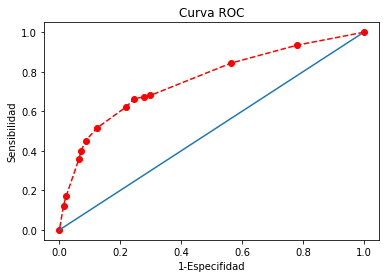

In [64]:
%matplotlib inline
plt.plot(especifities_1, sensitivities, marker="o", linestyle="--", color="r")
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x, y)  # diagonal
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

In [66]:
from sklearn import metrics
from pandas import Timestamp
# from ggplot import *

In [67]:
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)

In [68]:
df = pd.DataFrame({
    "esp": espc_1,
    "sens": sensit
})
df.head()

,esp,sens
0,0.000000,0.000000
1,0.000000,0.008197
2,0.000000,0.024590
3,0.000000,0.032787
4,0.002693,0.032787


In [69]:
ggplot(df, aes(x="esp", y="sens")) + geom_line() + geom_abline(linetype="dashed") + xlim(-0.01,1.01) + ylim(-0.01,1.01) + xlab("1-Especifidad") + ylab("Sensibilidad")

NameError: name 'ggplot' is not defined

In [70]:
# Area bajo la curva (area under curve)
auc = metrics.auc(espc_1, sensit)
auc

0.7579171204049798

In [71]:
ggplot(df, aes(x="esp", y="sens")) + geom_area(alpha=0.25) + geom_line(aes(y="sens")) + ggtitle("Curva ROC y AUC=%s"%str(auc))

NameError: name 'ggplot' is not defined